In [1]:
test_code1= """
partition:
  slli a3, a2, 2
  add a3, a3, a0
  lw a5, 0(a3)
  slli a4, a1, 2
  add a4, a0, a4
  addi a6, a4, 0
loop:
  lw a7, 0(a6)
  bgt a7, a5, newif
  lw t0, 0(a4)
  sw a7, 0(a4)
  sw t0, 0(a6)
  addi a4, a4, 4
newif:
  addi a6, a6, 4
  bgt a3, a6, loop
  lw t0, 0(a4)
  sw a5, 0(a4)
  sw t0, 0(a3)
  sub a0, a4, a0
  srai a0, a0, 2
  ret
"""

In [2]:
import re


def parse_assembly_code(assembly_code):
    instructions = []
    lines = assembly_code.split('\n')

    for line in lines:
        line = line.strip()

        # Skip empty lines and comments
        if not line or line.startswith(';'):
            continue

        # Split the line into instruction and arguments
        parts = re.split(r'\s+', line, maxsplit=1)
        instruction = parts[0]
        arguments = parts[1] if len(parts) > 1 else ''

        # Store the parsed instruction and arguments
        instructions.append((instruction, arguments))

    return instructions


# Example usage
assembly_code = """
    MOV R1, 10
    ADD R2, R1, 5
    SUB R3, R2, 3
"""

parsed_instructions = parse_assembly_code(assembly_code)
for instruction, arguments in parsed_instructions:
    print(f"Instruction: {instruction}\tArguments: {arguments}")


Instruction: MOV	Arguments: R1, 10
Instruction: ADD	Arguments: R2, R1, 5
Instruction: SUB	Arguments: R3, R2, 3


In [3]:
def parser(code:str)->None:
    lines = code.split('\n')
    instructions = []; labels = {}
    for index, line in enumerate(lines):
        if line.strip():
            if line[-1] == ':':
                labels[line[:-1]] = index
            elif line == 'ret':
                pass
            instruction = line.split()
            id = instruction[0]
            args = instruction[1:]
            if inst.process_grammar(id, args):
                pass
            else:
                raise Exception
    return inst

In [4]:
class AssemblyGrammer:
    is_reg = lambda index: lambda args : reg_valid(args[index]) or args[index] in reg_map
    is_reg_all = lambda args: all([reg_valid(arg) or arg in reg_map for arg in args])
    arg_length = lambda length: lambda args: len(args) == length

In [14]:
AssemblyGrammer.is_reg_all(['x0'])

True

In [16]:
class InstructionSet:
    def __init__(self, ):
        self.instructions = {}
        self.grammar = {}
    def add_instruction(self, identifier, grammar, function):
        self.instructions[identifier] = function
        self.grammar[identifier] = grammar
    def process_grammar(self, id, arguments):
        return all(
            [
                rule(arguments) for rule in self.grammar[id]
            ]
        )
    def apply_function():
        pass
    def execute(self, id, arguments):
        pass


In [17]:
inst = InstructionSet()
def add_assembly(args):
    regs[args[0]] = regs[args[1]] + regs[args[2]]
inst.add_instruction(
    'add',
    [
        AssemblyGrammer.is_reg_all,
        AssemblyGrammer.arg_length(3),
    ],
    add_assembly
)

In [18]:
parser(test_code1)

KeyError: 'partition:'

In [ ]:
label(Partition)

In [ ]:
LUI = lambda arg : lshift(arg)
ADD = lambda args : regs[args[0]] + regs[args[1]]



In [13]:
class Memory:
    def __init__(self, memory_size=100):
        self.memory = {}
        self.size = 0
    def __getitem__(self, address):
        return self.memory[address]
    def __setitem__(self, address, value):
        self.memory[address] = value

In [12]:
class RegisterSet:
    def __init__(self):
        self.registers = [0]*32
    def reg_to_index(self, reg):
        if isinstance(reg, RegIndex):
            return reg.num
        if reg_valid(reg):
            index = int(reg[1:])
        elif reg in reg_map:
            index = int(reg_map[reg][1:])
        else:
            raise Exception
        return index
    def __getitem__(self, reg):
        index = self.reg_to_index(reg)
        return self.registers[index]
    def __setitem__(self,reg ,value):
        index = self.reg_to_index(reg)
        self.registers[index] = value

In [52]:
regs = Register()

In [61]:
regs['gp']

5

In [25]:
aa = [f'x{i}' for i in range(32)]

In [6]:
import re

def reg_valid(reg):
    pattern = r'^x([0-9]|[1-2]\d|3[0-1])$'
    return bool(re.match(pattern, reg))


In [7]:
reg_map = {
        'zero': 'x0',
        'ra': 'x1',
        'sp': 'x2',
        'gp': 'x3',
        'tp': 'x4',
        't0': 'x5',
        't1': 'x6',
        't2': 'x7',
        's0': 'x8',
        's1': 'x9',
        'a0': 'x10',
        'a1': 'x11',
        'a2': 'x12',
        'a3': 'x13',
        'a4': 'x14',
        'a5': 'x15',
        'a6': 'x16',
        'a7': 'x17',
        's2': 'x18',
        's3': 'x19',
        's4': 'x20',
        's5': 'x21',
        's6': 'x22',
        's7': 'x23',
        's8': 'x24',
        's9': 'x25',
        's10': 'x26',
        's11': 'x27',
        't3': 'x28',
        't4': 'x29',
        't5': 'x30',
        't6': 'x31'
    }

In [8]:
class RegIndex:
    def __init__(self, num):
        self.num = num

In [9]:
x0 = zero = RegIndex(0)
x1 = ra = RegIndex(1)
x2 = sp = RegIndex(2)
x3 = gp = RegIndex(3)
x4 = tp = RegIndex(4)
x5 = t0 = RegIndex(5)
x6 = t1 = RegIndex(6)
x7 = t2 = RegIndex(7)
x8 = s0 = RegIndex(8)
x9 = s1 = RegIndex(9)
x10 = a0 = RegIndex(10)
x11 = a1 = RegIndex(11)
x12 = a2 = RegIndex(12)
x13 = a3 = RegIndex(13)
x14 = a4 = RegIndex(14)
x15 = a5 = RegIndex(15)
x16 = a6 = RegIndex(16)
x17 = a7 = RegIndex(17)
x18 = s2 = RegIndex(18)
x19 = s3 = RegIndex(19)
x20 = s4 = RegIndex(20)
x21 = s5 = RegIndex(21)
x22 = s6 = RegIndex(22)
x23 = s7 = RegIndex(23)
x24 = s8 = RegIndex(24)
x25 = s9 = RegIndex(25)
x26 = s10 = RegIndex(26)
x27 = s11 = RegIndex(27)
x28 = t3 = RegIndex(28)
x29 = t4 = RegIndex(29)
x30 = t5 = RegIndex(30)
x31 = t6 = RegIndex(31)

In [10]:
class Pyssemble:
    def __init__(self):
        self.regs = RegisterSet()
        

In [11]:
class pyInstruction:
    regs = RegisterSet()
    def __str__(self):
        return 'b'
    def __repr__(self):
        return ''

class add(pyInstruction):
    def __init__(self, rd, rs1, rs2):
        self.regs[rd] = self.regs[rs1] + self.regs[rs2]

class li(pyInstruction):
    def __init__(self, rd, constant):
        self.regs[rd] = constant


NameError: name 'RegisterSet' is not defined

In [110]:
pyinst = pyInstruction()

In [111]:
li(a1, 5)
add(a2, a1, zero)
add(a1, a1, a2)

a

In [105]:
pyinst.regs[a2]

5

In [119]:
11 ^ 6

13

In [21]:
import random

In [19]:
import time

In [20]:
def add(a, b):
    return a+b
addl = lambda a, b: a+ b

In [25]:
def test(n):
    x = [random.random() for _ in range(n)]
    y = [random.random() for _ in range(n)]
    st = time.time()
    _ = [add(x[i], y[i]) for i in range(n)]
    st = time.time() - st
    lt = time.time()
    _ = [addl(x[i], y[i]) for i in range(n)]
    lt = time.time() - lt 
    return st, lt

In [26]:
yz = [test(100*i) for i in range(100)]

In [28]:
import matplotlib.pyplot as plt

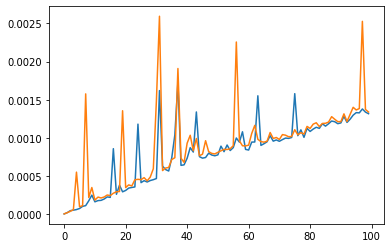

In [29]:
plt.plot(yz)